We'll be predicting the results of the following upcoming fights:


Israel Adesanya vs Robert Whittaker 2 (Middleweight)

Alexander Volkanovski vs Chan Sung Jung (Featherweight) 

Islam Makhachev vs Beneil Dariush (Lightweight)

Aljamain Sterling vs Petr Yan (Bantamweight) 

In [1]:
from jupyterthemes.stylefx import set_nb_theme
set_nb_theme('gruvboxd')

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import plotly.express as px
import seaborn as sns 
import missingno as msno

from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler
from sklearn.metrics import classification_report, roc_curve
from sklearn.metrics import confusion_matrix, roc_auc_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import plot_confusion_matrix
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score

from collections import Counter
from imblearn.over_sampling import ADASYN
from warnings import filterwarnings
from scipy.stats import zscore
import pickle
%matplotlib inline

In [3]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

In [4]:
sns.set(style = 'darkgrid', palette = 'bright')
pd.set_option('display.max_columns', None)
plt.rcParams['figure.figsize'] = (12, 8)
filterwarnings(action = 'ignore')
%matplotlib inline

In [5]:
raw = pd.concat(map(pd.read_csv, ['ufc-master.csv'])) 
df = raw.copy()

In [1385]:
display(df.head(), df.describe(), df.shape)

,R_fighter,B_fighter,R_odds,B_odds,R_ev,B_ev,date,location,country,Winner,title_bout,weight_class,gender,no_of_rounds,B_current_lose_streak,B_current_win_streak,B_draw,B_avg_SIG_STR_landed,B_avg_SIG_STR_pct,B_avg_SUB_ATT,B_avg_TD_landed,B_avg_TD_pct,B_longest_win_streak,B_losses,B_total_rounds_fought,B_total_title_bouts,B_win_by_Decision_Majority,B_win_by_Decision_Split,B_win_by_Decision_Unanimous,B_win_by_KO/TKO,B_win_by_Submission,B_win_by_TKO_Doctor_Stoppage,B_wins,B_Stance,B_Height_cms,B_Reach_cms,B_Weight_lbs,R_current_lose_streak,R_current_win_streak,R_draw,R_avg_SIG_STR_landed,R_avg_SIG_STR_pct,R_avg_SUB_ATT,R_avg_TD_landed,R_avg_TD_pct,R_longest_win_streak,R_losses,R_total_rounds_fought,R_total_title_bouts,R_win_by_Decision_Majority,R_win_by_Decision_Split,R_win_by_Decision_Unanimous,R_win_by_KO/TKO,R_win_by_Submission,R_win_by_TKO_Doctor_Stoppage,R_wins,R_Stance,R_Height_cms,R_Reach_cms,R_Weight_lbs,R_age,B_age,lose_streak_dif,win_streak_dif,longest_win_streak_dif,win_dif,loss_dif,total_round_dif,total_title_bout_dif,ko_dif,sub_dif,height_dif,reach_dif,age_dif,sig_str_dif,avg_sub_att_dif,avg_td_dif,empty_arena,constant_1,B_match_weightclass_rank,R_match_weightclass_rank,R_Women's Flyweight_rank,R_Women's Featherweight_rank,R_Women's Strawweight_rank,R_Women's Bantamweight_rank,R_Heavyweight_rank,R_Light Heavyweight_rank,R_Middleweight_rank,R_Welterweight_rank,R_Lightweight_rank,R_Featherweight_rank,R_Bantamweight_rank,R_Flyweight_rank,R_Pound-for-Pound_rank,B_Women's Flyweight_rank,B_Women's Featherweight_rank,B_Women's Strawweight_rank,B_Women's Bantamweight_rank,B_Heavyweight_rank,B_Light Heavyweight_rank,B_Middleweight_rank,B_Welterweight_rank,B_Lightweight_rank,B_Featherweight_rank,B_Bantamweight_rank,B_Flyweight_rank,B_Pound-for-Pound_rank,better_rank,finish,finish_details,finish_round,finish_round_time,total_fight_time_secs,r_dec_odds,b_dec_odds,r_sub_odds,b_sub_odds,r_ko_odds,b_ko_odds
0,Thiago Santos,Johnny Walker,-150.0,130,66.666667,130.000000,2021-10-02,"Las Vegas, Nevada, USA",USA,Red,False,Light Heavyweight,MALE,5,0,1,0,3.42,0.59,0.7,0.24,1.00,4,2,11,0,0,0,1,4,0,0,5,Orthodox,198.12,208.28,205,3,0,0,3.95,0.48,0.1,0.61,0.36,4,8,43,1,0,0,2,11,0,0,13,Orthodox,187.96,193.04,205,37,29,-3,1,0,-8,-6,-32,-1,-7,0,10.16,15.24,-8,-0.53,0.6,-0.37,1,1,10.0,5.0,NaN,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Red,U-DEC,NaN,5.0,5:00,1500.0,800.0,900.0,2000.0,1600.0,-110.0,175.0
1,Alex Oliveira,Niko Price,170.0,-200,170.000000,50.000000,2021-10-02,"Las Vegas, Nevada, USA",USA,Blue,False,Welterweight,MALE,3,2,0,0,5.16,0.42,0.8,0.79,0.22,2,5,24,0,0,0,0,4,2,0,6,Orthodox,182.88,193.04,170,2,0,0,2.97,0.51,0.5,2.27,0.37,4,8,44,0,0,1,3,4,3,0,11,Orthodox,180.34,193.04,170,33,32,0,0,-2,-5,-3,-20,0,0,-1,2.54,0.00,-1,2.19,0.3,-1.48,1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,neither,U-DEC,NaN,3.0,5:00,900.0,450.0,350.0,700.0,1100.0,550.0,120.0
2,Misha Cirkunov,Krzysztof Jotko,110.0,-130,110.000000,76.923077,2021-10-02,"Las Vegas, Nevada, USA",USA,Blue,False,Middleweight,MALE,3,1,0,0,2.92,0.41,0.1,1.15,0.34,5,5,38,0,0,2,6,1,0,0,9,Southpaw,185.42,195.58,185,1,0,0,3.77,0.49,1.7,4.48,0.44,4,4,13,0,0,0,0,1,5,0,6,Orthodox,190.50,195.58,205,34,32,0,0,1,3,1,25,0,0,-5,-5.08,0.00,-2,-0.85,-1.6,-3.33,1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,neither,S-DEC,NaN,3.0,5:00,900.0,550.0,275.0,275.0,1400.0,600.0,185.0
3,Alexander Hernandez,Mike Breeden,-675.0,475,14.814815,475.000000,2021-10-02,"Las Vegas, Nevada, USA",USA,Red,False,Lightweight,MALE,3,1,0,0,4.04,0.34,0.0,0.00,0.00,0,1,3,0,0,0,0,0,0,0,0,Orthodox,177.80,177.80,155,1,0,0,3.79,0.36,0.0,1.57,0.35,2,3,15,0,0,0,2,2,0,0,4,Orthodox,175.26,182.88,155,29,32,0,0,-2,-4,-2,-12,0,-2,0,2.54,-5.08,3,0.25,0.0,-1.57,1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N

,R_odds,B_odds,R_ev,B_ev,no_of_rounds,B_current_lose_streak,B_current_win_streak,B_draw,B_avg_SIG_STR_landed,B_avg_SIG_STR_pct,B_avg_SUB_ATT,B_avg_TD_landed,B_avg_TD_pct,B_longest_win_streak,B_losses,B_total_rounds_fought,B_total_title_bouts,B_win_by_Decision_Majority,B_win_by_Decision_Split,B_win_by_Decision_Unanimous,B_win_by_KO/TKO,B_win_by_Submission,B_win_by_TKO_Doctor_Stoppage,B_wins,B_Height_cms,B_Reach_cms,B_Weight_lbs,R_current_lose_streak,R_current_win_streak,R_draw,R_avg_SIG_STR_landed,R_avg_SIG_STR_pct,R_avg_SUB_ATT,R_avg_TD_landed,R_avg_TD_pct,R_longest_win_streak,R_losses,R_total_rounds_fought,R_total_title_bouts,R_win_by_Decision_Majority,R_win_by_Decision_Split,R_win_by_Decision_Unanimous,R_win_by_KO/TKO,R_win_by_Submission,R_win_by_TKO_Doctor_Stoppage,R_wins,R_Height_cms,R_Reach_cms,R_Weight_lbs,R_age,B_age,lose_streak_dif,win_streak_dif,longest_win_streak_dif,win_dif,loss_dif,total_round_dif,total_title_bout_dif,ko_dif,sub_dif,height_dif,reach_dif,age_dif,sig_str_dif,avg_sub_att_dif,avg_td_dif,empty_arena,constant_1,B_match_weightclass_rank,R_match_weightclass_rank,R_Women's Flyweight_rank,R_Women's Featherweight_rank,R_Women's Strawweight_rank,R_Women's Bantamweight_rank,R_Heavyweight_rank,R_Light Heavyweight_rank,R_Middleweight_rank,R_Welterweight_rank,R_Lightweight_rank,R_Featherweight_rank,R_Bantamweight_rank,R_Flyweight_rank,R_Pound-for-Pound_rank,B_Women's Flyweight_rank,B_Women's Featherweight_rank,B_Women's Strawweight_rank,B_Women's Bantamweight_rank,B_Heavyweight_rank,B_Light Heavyweight_rank,B_Middleweight_rank,B_Welterweight_rank,B_Lightweight_rank,B_Featherweight_rank,B_Bantamweight_rank,B_Flyweight_rank,B_Pound-for-Pound_rank,finish_round,total_fight_time_secs,r_dec_odds,b_dec_odds,r_sub_odds,b_sub_odds,r_ko_odds,b_ko_odds
count,4895.000000,4896.000000,4895.000000,4896.000000,4896.000000,4896.000000,4896.000000,4896.000000,3966.000000,4131.000000,4064.000000,4063.000000,4054.000000,4896.00000,4896.000000,4896.000000,4896.000000,4896.000000,4896.000000,4896.000000,4896.000000,4896.000000,4896.000000,4896.000000,4896.000000,4896.000000,4896.000000,4896.000000,4896.000000,4896.000000,4441.000000,4539.000000,4539.000000,4539.000000,4529.000000,4896.000000,4896.000000,4896.000000,4896.000000,4896.000000,4896.000000,4896.000000,4896.000000,4896.000000,4896.000000,4896.000000,4896.000000,4896.000000,4896.000000,4896.000000,4896.000000,4896.000000,4896.000000,4896.000000,4896.000000,4896.000000,4896.000000,4896.000000,4896.000000,4896.000000,4896.000000,4896.000000,4896.000000,4896.000000,4896.000000,4896.000000,4896.000000,4896.0,877.000000,1328.000000,59.000000,7.0,104.000000,118.000000,142.000000,141.000000,134.000000,140.000000,139.000000,133.000000,137.000000,142.000000,166.000000,44.000000,0.0,61.000000,78.000000,110.000000,93.000000,102.000000,89.000000,87.000000,90.000000,85.000000,95.000000,35.000000,4274.000000,4274.000000,4093.000000,4077.000000,3847.000000,3835.000000,3847.000000,3834.000000
mean,-117.640449,66.030637,94.827397,167.083323,3.181985,0.477941,0.875408,0.010621,26.308553,0.444741,0.504614,1.251173,0.312506,1.76491,1.726511,10.742443,0.232639,0.014502,0.260417,0.975490,0.960989,0.588848,0.029616,2.880923,178.084669,182.435958,164.803105,0.613154,1.051062,0.013480,27.396408,0.454709,0.517659,1.337388,0.329411,2.530842,2.393587,15.950980,0.552083,0.025735,0.365809,1.468750,1.449551,0.866422,0.047386,4.293709,178.030948,182.619835,165.253472,30.056985,29.518382,0.105392,-0.175449,-0.765931,-1.412786,0.370507,-5.208538,-0.319444,-0.506332,-0.277574,0.018591,-0.251172,0.329044,-3.539160,-0.061050,-0.201570,0.138480,1.0,8.262258,6.834337,6.677966,0.0,6.826923,7.050847,6.774648,6.673759,7.649254,6.807143,7.093525,6.827068,6.985401,6.457746,6.789157,7.795455,NaN,7.803279,8.192308,8.490909,8.268817,8.745098,8.179775,8.126437,8.022222,8.388235,8.473684,9.485714,2.408049,652.313758,294.064745,416.544027,843.010138,1064.543155,514.231869,647.257173
std,268.881452,247.803928,82.843409,136.944

(4896, 119)

Data Cleaning, Preprocessing and Feature Engineering

In [1386]:
print(f'Features before transformation:\n\n {df.columns}\n')
df.columns = df.columns.str.strip()
df.rename(columns = lambda x: x.lower(), inplace = True) 
print(f'Features after transformation:\n\n {df.columns}')

Features before transformation:

 Index(['R_fighter', 'B_fighter', 'R_odds', 'B_odds', 'R_ev', 'B_ev', 'date',
       'location', 'country', 'Winner',
       ...
       'finish_details', 'finish_round', 'finish_round_time',
       'total_fight_time_secs', 'r_dec_odds', 'b_dec_odds', 'r_sub_odds',
       'b_sub_odds', 'r_ko_odds', 'b_ko_odds'],
      dtype='object', length=119)

Features after transformation:

 Index(['r_fighter', 'b_fighter', 'r_odds', 'b_odds', 'r_ev', 'b_ev', 'date',
       'location', 'country', 'winner',
       ...
       'finish_details', 'finish_round', 'finish_round_time',
       'total_fight_time_secs', 'r_dec_odds', 'b_dec_odds', 'r_sub_odds',
       'b_sub_odds', 'r_ko_odds', 'b_ko_odds'],
      dtype='object', length=119)


In [1387]:
for f in df.columns:
    if df[f].dtype == 'O':
        df[f] = df[f].str.strip()
        print(f'The unique values for {f} variable: {df[f].unique()}\n')

The unique values for r_fighter variable: ['Thiago Santos' 'Alex Oliveira' 'Misha Cirkunov' ... 'Caol Uno'
 'Eliot Marshall' 'Eric Schafer']

The unique values for b_fighter variable: ['Johnny Walker' 'Niko Price' 'Krzysztof Jotko' ... 'James Irvin'
 'Shannon Gugerty' 'Chase Gormley']

The unique values for date variable: ['2021-10-02' '2021-09-25' '2021-09-18' '2021-09-04' '2021-08-28'
 '8/21/2021' '8/7/2021' '7/31/2021' '7/24/2021' '7/17/2021' '7/10/2021'
 '6/26/2021' '6/19/2021' '6/12/2021' '6/5/2021' '5/22/2021' '5/15/2021'
 '5/8/2021' '5/1/2021' '4/24/2021' '4/17/2021' '4/10/2021' '3/27/2021'
 '3/20/2021' '3/13/2021' '3/6/2021' '2/27/2021' '2/20/2021' '2/13/2021'
 '2/6/2021' '1/23/2021' '1/20/2021' '1/16/2021' '12/19/2020' '12/12/2020'
 '12/5/2020' '11/28/2020' '11/21/2020' '11/14/2020' '11/7/2020'
 '10/31/2020' '10/24/2020' '10/17/2020' '10/10/2020' '10/3/2020'
 '9/26/2020' '9/19/2020' '9/12/2020' '9/5/2020' '8/29/2020' '8/22/2020'
 '8/15/2020' '8/8/2020' '8/1/2020' '7/25/2020' '

In [882]:
df.duplicated().sum() # No duplicate rows

0

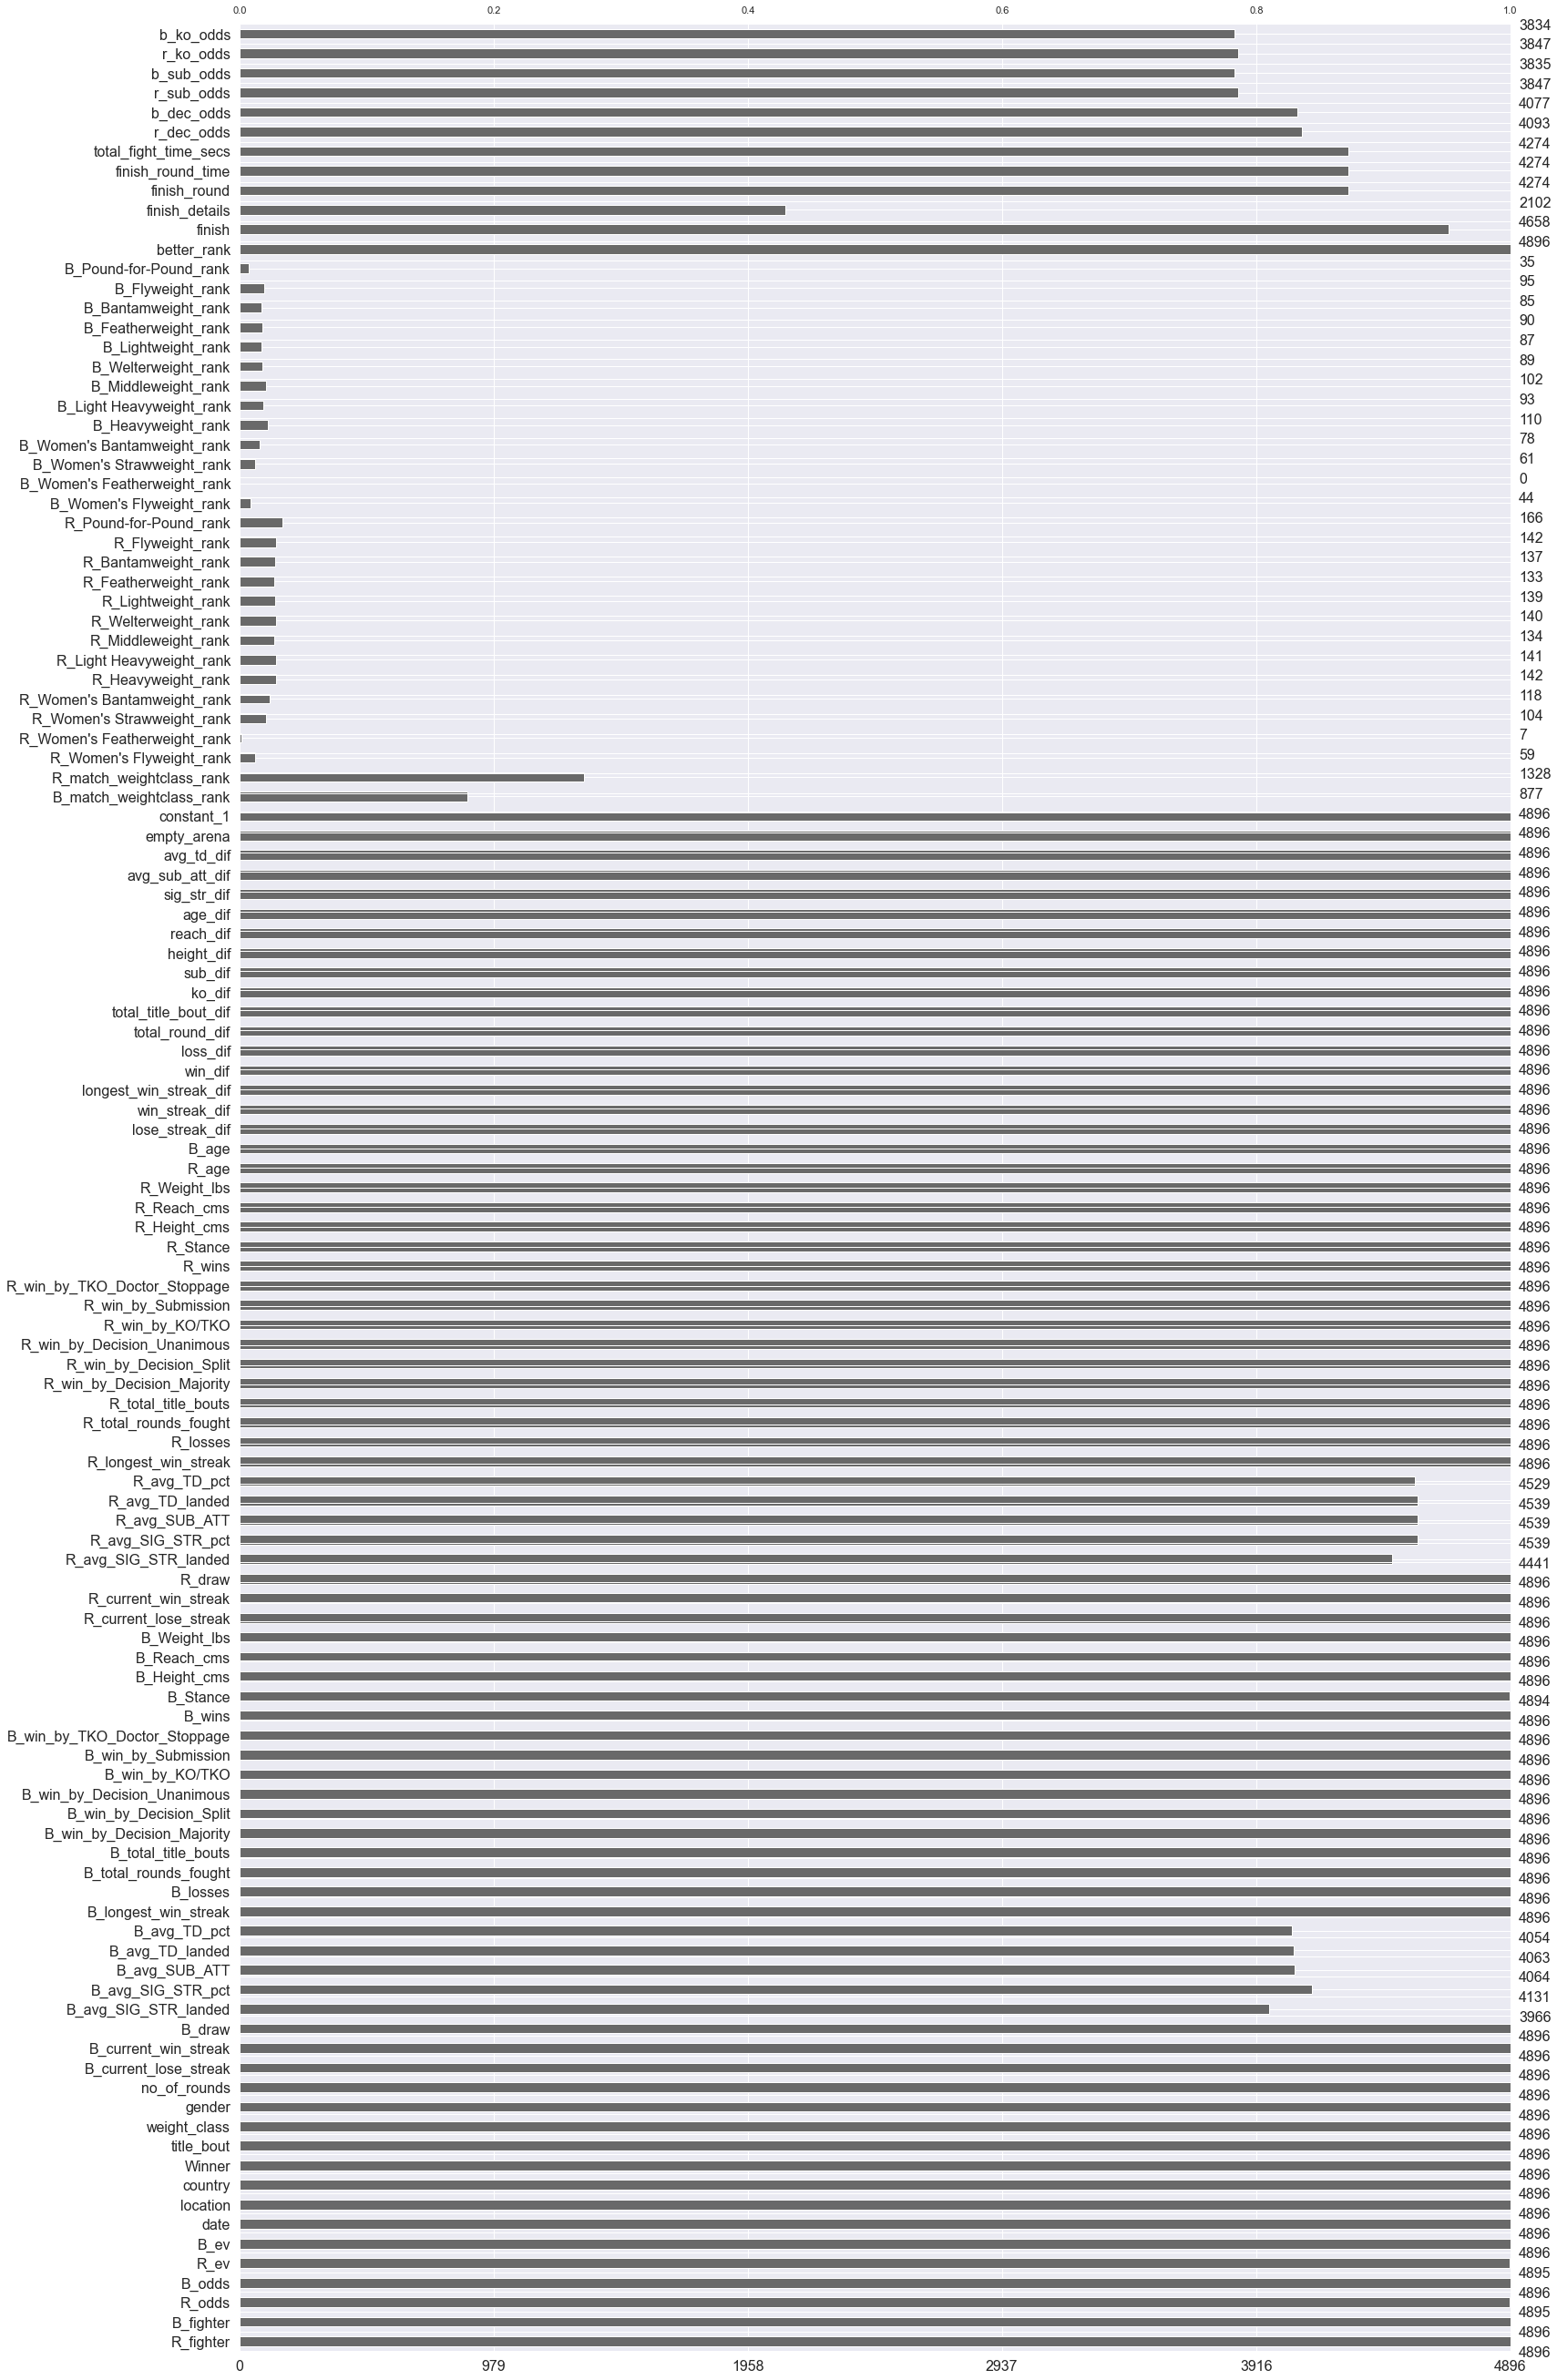

In [1154]:
#let's visualize the missing values in the dataset
msno.bar(df)
plt.show()

In [1155]:
''' Missing values per column
in percentage
'''
for column in df.columns:
    n_missing = df[column].isnull().sum()
    ratio = n_missing / df.shape[0]
    if ratio!=0:
        print(f'For column {column}: {ratio:.2%}')  

For column R_odds: 0.02%
For column R_ev: 0.02%
For column B_avg_SIG_STR_landed: 19.00%
For column B_avg_SIG_STR_pct: 15.62%
For column B_avg_SUB_ATT: 16.99%
For column B_avg_TD_landed: 17.01%
For column B_avg_TD_pct: 17.20%
For column B_Stance: 0.04%
For column R_avg_SIG_STR_landed: 9.29%
For column R_avg_SIG_STR_pct: 7.29%
For column R_avg_SUB_ATT: 7.29%
For column R_avg_TD_landed: 7.29%
For column R_avg_TD_pct: 7.50%
For column B_match_weightclass_rank: 82.09%
For column R_match_weightclass_rank: 72.88%
For column R_Women's Flyweight_rank: 98.79%
For column R_Women's Featherweight_rank: 99.86%
For column R_Women's Strawweight_rank: 97.88%
For column R_Women's Bantamweight_rank: 97.59%
For column R_Heavyweight_rank: 97.10%
For column R_Light Heavyweight_rank: 97.12%
For column R_Middleweight_rank: 97.26%
For column R_Welterweight_rank: 97.14%
For column R_Lightweight_rank: 97.16%
For column R_Featherweight_rank: 97.28%
For column R_Bantamweight_rank: 97.20%
For column R_Flyweight_ran

In [230]:
'''Dropping the columns with 
null values higher than 30% 
'''
for column in df.columns:
    n_missing = df[column].isnull().sum()
    ratio = n_missing / df.shape[0]
    if ratio>0.3:
        df.drop(column, axis=1, inplace=True)
print(f'Number of features now: {df.shape[1]}')     

Number of features now: 90


In [1388]:
df['date'] = pd.to_datetime(df['date'])

In [1389]:
df_numeric = df[[f for f in df.columns if df[f].dtype =='float64' or df[f].dtype =='int64']]
df_categoric = df[[f for f in df.columns if df[f].dtype =='O']]
df_d = df['date']

In [1390]:
display(df_numeric.head(), df_categoric.head()) 

,r_odds,b_odds,r_ev,b_ev,no_of_rounds,b_current_lose_streak,b_current_win_streak,b_draw,b_avg_sig_str_landed,b_avg_sig_str_pct,b_avg_sub_att,b_avg_td_landed,b_avg_td_pct,b_longest_win_streak,b_losses,b_total_rounds_fought,b_total_title_bouts,b_win_by_decision_majority,b_win_by_decision_split,b_win_by_decision_unanimous,b_win_by_ko/tko,b_win_by_submission,b_win_by_tko_doctor_stoppage,b_wins,b_height_cms,b_reach_cms,b_weight_lbs,r_current_lose_streak,r_current_win_streak,r_draw,r_avg_sig_str_landed,r_avg_sig_str_pct,r_avg_sub_att,r_avg_td_landed,r_avg_td_pct,r_longest_win_streak,r_losses,r_total_rounds_fought,r_total_title_bouts,r_win_by_decision_majority,r_win_by_decision_split,r_win_by_decision_unanimous,r_win_by_ko/tko,r_win_by_submission,r_win_by_tko_doctor_stoppage,r_wins,r_height_cms,r_reach_cms,r_weight_lbs,r_age,b_age,lose_streak_dif,win_streak_dif,longest_win_streak_dif,win_dif,loss_dif,total_round_dif,total_title_bout_dif,ko_dif,sub_dif,height_dif,reach_dif,age_dif,sig_str_dif,avg_sub_att_dif,avg_td_dif,empty_arena,constant_1,b_match_weightclass_rank,r_match_weightclass_rank,r_women's flyweight_rank,r_women's featherweight_rank,r_women's strawweight_rank,r_women's bantamweight_rank,r_heavyweight_rank,r_light heavyweight_rank,r_middleweight_rank,r_welterweight_rank,r_lightweight_rank,r_featherweight_rank,r_bantamweight_rank,r_flyweight_rank,r_pound-for-pound_rank,b_women's flyweight_rank,b_women's featherweight_rank,b_women's strawweight_rank,b_women's bantamweight_rank,b_heavyweight_rank,b_light heavyweight_rank,b_middleweight_rank,b_welterweight_rank,b_lightweight_rank,b_featherweight_rank,b_bantamweight_rank,b_flyweight_rank,b_pound-for-pound_rank,finish_round,total_fight_time_secs,r_dec_odds,b_dec_odds,r_sub_odds,b_sub_odds,r_ko_odds,b_ko_odds
0,-150.0,130,66.666667,130.000000,5,0,1,0,3.42,0.59,0.7,0.24,1.00,4,2,11,0,0,0,1,4,0,0,5,198.12,208.28,205,3,0,0,3.95,0.48,0.1,0.61,0.36,4,8,43,1,0,0,2,11,0,0,13,187.96,193.04,205,37,29,-3,1,0,-8,-6,-32,-1,-7,0,10.16,15.24,-8,-0.53,0.6,-0.37,1,1,10.0,5.0,NaN,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,1500.0,800.0,900.0,2000.0,1600.0,-110.0,175.0
1,170.0,-200,170.000000,50.000000,3,2,0,0,5.16,0.42,0.8,0.79,0.22,2,5,24,0,0,0,0,4,2,0,6,182.88,193.04,170,2,0,0,2.97,0.51,0.5,2.27,0.37,4,8,44,0,0,1,3,4,3,0,11,180.34,193.04,170,33,32,0,0,-2,-5,-3,-20,0,0,-1,2.54,0.00,-1,2.19,0.3,-1.48,1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,900.0,450.0,350.0,700.0,1100.0,550.0,120.0
2,110.0,-130,110.000000,76.923077,3,1,0,0,2.92,0.41,0.1,1.15,0.34,5,5,38,0,0,2,6,1,0,0,9,185.42,195.58,185,1,0,0,3.77,0.49,1.7,4.48,0.44,4,4,13,0,0,0,0,1,5,0,6,190.50,195.58,205,34,32,0,0,1,3,1,25,0,0,-5,-5.08,0.00,-2,-0.85,-1.6,-3.33,1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,900.0,550.0,275.0,275.0,1400.0,600.0,185.0
3,-675.0,475,14.814815,475.000000,3,1,0,0,4.04,0.34,0.0,0.00,0.00,0,1,3,0,0,0,0,0,0,0,0,177.80,177.80,155,1,0,0,3.79,0.36,0.0,1.57,0.35,2,3,15,0,0,0,2,2,0,0,4,175.26,182.88,155,29,32,0,0,-2,-4,-2,-12,0,-2,0,2.54,-5.08,3,0.25,0.0,-1.57,1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,80.0,175.0,900.0,500.0,3500.0,110.0,1100.0
4,-135.0,115,74.074074,115.000000,3,0,2,0,5.22,0.56,0.0,2.54,0.39,2,3,19,0,0,0,4,1,0,0,5,175.26,172.72,145,0,4,0,2.64,0.62,0.6,2.85,0.52,4,0,8,0,0,0,2,0,2,0,4,175.26,177.80,155,28,33,0,-2,-2,1,3,11,0,1,-2,0.00,-5.08,5,2.58,-0.6,-0.31,1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,900.0,165.0,200.0,400.0,1200.0,900.0,600.0


,r_fighter,b_fighter,location,country,winner,weight_class,gender,b_stance,r_stance,better_rank,finish,finish_details,finish_round_time
0,Thiago Santos,Johnny Walker,"Las Vegas, Nevada, USA",USA,Red,Light Heavyweight,MALE,Orthodox,Orthodox,Red,U-DEC,NaN,5:00
1,Alex Oliveira,Niko Price,"Las Vegas, Nevada, USA",USA,Blue,Welterweight,MALE,Orthodox,Orthodox,neither,U-DEC,NaN,5:00
2,Misha Cirkunov,Krzysztof Jotko,"Las Vegas, Nevada, USA",USA,Blue,Middleweight,MALE,Southpaw,Orthodox,neither,S-DEC,NaN,5:00
3,Alexander Hernandez,Mike Breeden,"Las Vegas, Nevada, USA",USA,Red,Lightweight,MALE,Orthodox,Orthodox,neither,KO/TKO,Punch,1:20
4,Joe Solecki,Jared Gordon,"Las Vegas, Nevada, USA",USA,Blue,Lightweight,MALE,Orthodox,Orthodox,neither,S-DEC,NaN,5:00


In [1391]:
for f in df_categoric.columns:
    le = LabelEncoder()
    df_categoric[f] = le.fit_transform(df_categoric[f])

In [1392]:
for f in df_numeric.columns:
    df_numeric[f].fillna(df_numeric[f].mean(), inplace=True)

In [1393]:
df = pd.concat([df_numeric, df_categoric], axis=1)

In [1176]:
df.tail()

,r_odds,b_odds,r_ev,b_ev,no_of_rounds,b_current_lose_streak,b_current_win_streak,b_draw,b_avg_sig_str_landed,b_avg_sig_str_pct,b_avg_sub_att,b_avg_td_landed,b_avg_td_pct,b_longest_win_streak,b_losses,b_total_rounds_fought,b_total_title_bouts,b_win_by_decision_majority,b_win_by_decision_split,b_win_by_decision_unanimous,b_win_by_ko/tko,b_win_by_submission,b_win_by_tko_doctor_stoppage,b_wins,b_height_cms,b_reach_cms,b_weight_lbs,r_current_lose_streak,r_current_win_streak,r_draw,r_avg_sig_str_landed,r_avg_sig_str_pct,r_avg_sub_att,r_avg_td_landed,r_avg_td_pct,r_longest_win_streak,r_losses,r_total_rounds_fought,r_total_title_bouts,r_win_by_decision_majority,r_win_by_decision_split,r_win_by_decision_unanimous,r_win_by_ko/tko,r_win_by_submission,r_win_by_tko_doctor_stoppage,r_wins,r_height_cms,r_reach_cms,r_weight_lbs,r_age,b_age,lose_streak_dif,win_streak_dif,longest_win_streak_dif,win_dif,loss_dif,total_round_dif,total_title_bout_dif,ko_dif,sub_dif,height_dif,reach_dif,age_dif,sig_str_dif,avg_sub_att_dif,avg_td_dif,empty_arena,constant_1,b_match_weightclass_rank,r_match_weightclass_rank,r_women's flyweight_rank,r_women's featherweight_rank,r_women's strawweight_rank,r_women's bantamweight_rank,r_heavyweight_rank,r_light heavyweight_rank,r_middleweight_rank,r_welterweight_rank,r_lightweight_rank,r_featherweight_rank,r_bantamweight_rank,r_flyweight_rank,r_pound-for-pound_rank,b_women's flyweight_rank,b_women's featherweight_rank,b_women's strawweight_rank,b_women's bantamweight_rank,b_heavyweight_rank,b_light heavyweight_rank,b_middleweight_rank,b_welterweight_rank,b_lightweight_rank,b_featherweight_rank,b_bantamweight_rank,b_flyweight_rank,b_pound-for-pound_rank,finish_round,total_fight_time_secs,r_dec_odds,b_dec_odds,r_sub_odds,b_sub_odds,r_ko_odds,b_ko_odds,r_fighter,b_fighter,location,country,winner,weight_class,gender,b_stance,r_stance,better_rank,finish,finish_details,finish_round_time
4891,-155.0,135,64.516129,135.0,3,0,0,0,26.308553,0.444741,0.504614,1.251173,0.312506,0,0,0,0,0,0,0,0,0,0,0,177.80,180.34,145,1,0,0,13.666667,0.576667,0.000000,0.000000,0.000,2,1,5,0,0,0,1,1,0,0,2,177.80,177.80,170,31,25,1,0,-2,-2,1,-5,0,-1,0,0.00,2.54,6,-13.666667,0.000000,0.000000,0,1,8.262258,6.834337,6.677966,0.0,6.826923,7.050847,6.774648,6.673759,7.649254,6.807143,7.093525,6.827068,6.985401,6.457746,6.789157,7.795455,NaN,7.803279,8.192308,8.490909,8.268817,8.745098,8.179775,8.126437,8.022222,8.388235,8.473684,9.485714,1.0,44.0,294.064745,416.544027,843.010138,1064.543155,514.231869,647.257173,372,369,26,21,0,6,1,1,1,2,1,31,37
4892,-210.0,175,47.619048,175.0,3,0,0,0,26.308553,0.444741,0.504614,1.251173,0.312506,0,0,0,0,0,0,0,0,0,0,0,177.80,187.96,170,0,3,0,18.000000,0.550000,1.000000,4.666667,0.790,3,0,9,0,0,2,0,1,0,0,3,170.18,180.34,170,27,29,0,-3,-3,-3,0,-9,0,-1,0,7.62,7.62,-2,-18.000000,-1.000000,-4.666667,0,1,8.262258,6.834337,6.677966,0.0,6.826923,7.050847,6.774648,6.673759,7.649254,6.807143,7.093525,6.827068,6.985401,6.457746,6.789157,7.795455,NaN,7.803279,8.192308,8.490909,8.268817,8.745098,8.179775,8.126437,8.022222,8.388235,8.473684,9.485714,1.0,121.0,294.064745,416.544027,843.010138,1064.543155,514.231869,647.257173,625,349,26,21,1,8,1,2,1,2,1,24,114
4893,-260.0,220,38.461538,220.0,3,1,0,0,8.000000,0.340000,1.000000,1.000000,1.000000,0,1,1,0,0,0,0,0,0,0,0,190.50,196.00,265,1,0,0,12.000000,0.250000,0.000000,0.000000,0.000,0,1,1,1,0,0,0,0,0,0,0,193.04,198.12,245,27,27,0,0,0,0,0,0,-1,0,0,-2.54,-2.12,0,-4.000000,1.000000,1.000000,0,1,8.262258,6.834337,6.677966,0.0,6.826923,7.050847,6.774648,6.673759,7.649254,6.807143,7.093525,6.827068,6.985401,6.457746,6.789157,7.795455,NaN,7.803279,8.192308,8.490909,8.268817,8.745098,8.179775,8.126437,8.022222,8.388235,8.473684,9.485714,1.0,47.0,294.064745,416.544027,843.010138,1064.543155,514.231869,647.257173,162,248,26,21,1,4,1,1,1,2,1,25,40
4894,-420.0,335,23.809524,335.0,3,0,0,0,26.308553,0.444741,0.504614,1.251173,0.312506,0,0,0,0,0,0,0,0,0,0,0,182.88,185.42,170,1,0,0,40.500000,0.405000,0.00000

Let's check the correlation via spearman method since our columns aren't normally distributed.

In [230]:
pearson_corr = pd.DataFrame(abs(df.corr(method='spearman')['winner']).sort_values(ascending=False))

In [96]:
pearson_corr.T # winner is the target variable

,winner,b_ev,b_odds,r_ev,r_odds,b_dec_odds,b_ko_odds,r_ko_odds,r_dec_odds,b_sub_odds,age_dif,r_sub_odds,b_age,r_age,win_streak_dif,avg_td_dif,r_losses,sig_str_dif,r_win_by_decision_split,reach_dif,r_avg_td_landed,r_avg_td_pct,r_avg_sig_str_pct,r_current_lose_streak,loss_dif,r_current_win_streak,b_avg_sig_str_landed,b_current_win_streak,b_match_weightclass_rank,b_reach_cms,longest_win_streak_dif,r_match_weightclass_rank,finish,no_of_rounds,height_dif,b_avg_td_landed,lose_streak_dif,b_avg_sig_str_pct,total_round_dif,b_height_cms,avg_sub_att_dif,b_featherweight_rank,b_win_by_decision_unanimous,b_welterweight_rank,r_stance,b_weight_lbs,b_fighter,r_heavyweight_rank,r_avg_sig_str_landed,r_win_by_tko_doctor_stoppage,r_total_rounds_fought,r_total_title_bouts,better_rank,b_women's strawweight_rank,r_flyweight_rank,r_women's bantamweight_rank,b_longest_win_streak,r_longest_win_streak,b_losses,ko_dif,b_women's bantamweight_rank,b_draw,r_avg_sub_att,b_flyweight_rank,b_win_by_decision_split,r_featherweight_rank,finish_round,b_current_lose_streak,weight_class,b_women's flyweight_rank,total_fight_time_secs,b_avg_sub_att,r_win_by_decision_majority,r_win_by_submission,r_light heavyweight_rank,b_wins,b_avg_td_pct,r_weight_lbs,b_win_by_tko_doctor_stoppage,b_total_title_bouts,r_bantamweight_rank,total_title_bout_dif,gender,r_women's flyweight_rank,r_win_by_ko/tko,b_bantamweight_rank,r_women's strawweight_rank,b_total_rounds_fought,b_win_by_ko/tko,r_reach_cms,r_lightweight_rank,r_fighter,b_light heavyweight_rank,sub_dif,r_win_by_decision_unanimous,win_dif,b_heavyweight_rank,b_lightweight_rank,b_win_by_submission,b_pound-for-pound_rank,country,b_stance,b_win_by_decision_majority,r_middleweight_rank,finish_round_time,r_wins,r_draw,finish_details,r_welterweight_rank,r_height_cms,empty_arena,location,b_middleweight_rank,r_pound-for-pound_rank,constant_1,r_women's featherweight_rank,b_women's featherweight_rank
winner,1.0,0.345773,0.345621,0.345557,0.345131,0.214897,0.175514,0.159812,0.155378,0.141195,0.117289,0.116547,0.103181,0.101685,0.095381,0.078979,0.076937,0.066264,0.06568,0.064672,0.064377,0.06212,0.059914,0.059671,0.057401,0.056857,0.045832,0.043509,0.041393,0.038292,0.037749,0.03726,0.036896,0.036592,0.035905,0.034385,0.034194,0.033233,0.032657,0.030548,0.030455,0.030442,0.029035,0.0259,0.025814,0.025723,0.024708,0.024498,0.024484,0.02447,0.023884,0.023697,0.023064,0.022598,0.022281,0.02192,0.02188,0.020715,0.020512,0.019977,0.019796,0.019183,0.01864,0.018517,0.018337,0.018133,0.018099,0.017946,0.017487,0.016826,0.016726,0.016126,0.014339,0.014088,0.013733,0.013685,0.013346,0.013305,0.012004,0.011088,0.009846,0.009721,0.009506,0.009231,0.0088,0.008582,0.00853,0.00847,0.008433,0.008076,0.00781,0.007744,0.007117,0.006924,0.00683,0.006302,0.005685,0.005476,0.005416,0.004483,0.004383,0.004146,0.003943,0.003796,0.003465,0.002404,0.002266,0.002213,0.001952,0.001908,0.001301,0.000742,0.000512,0.000175,NaN,NaN,NaN


In [49]:
# Dropping the columns with little to no effect on the target
a = pearson_corr[pearson_corr['winner']>0.02].T.columns

In [241]:
for f in df.columns:
    if f not in a:
        df.drop(f, axis=1, inplace=True)

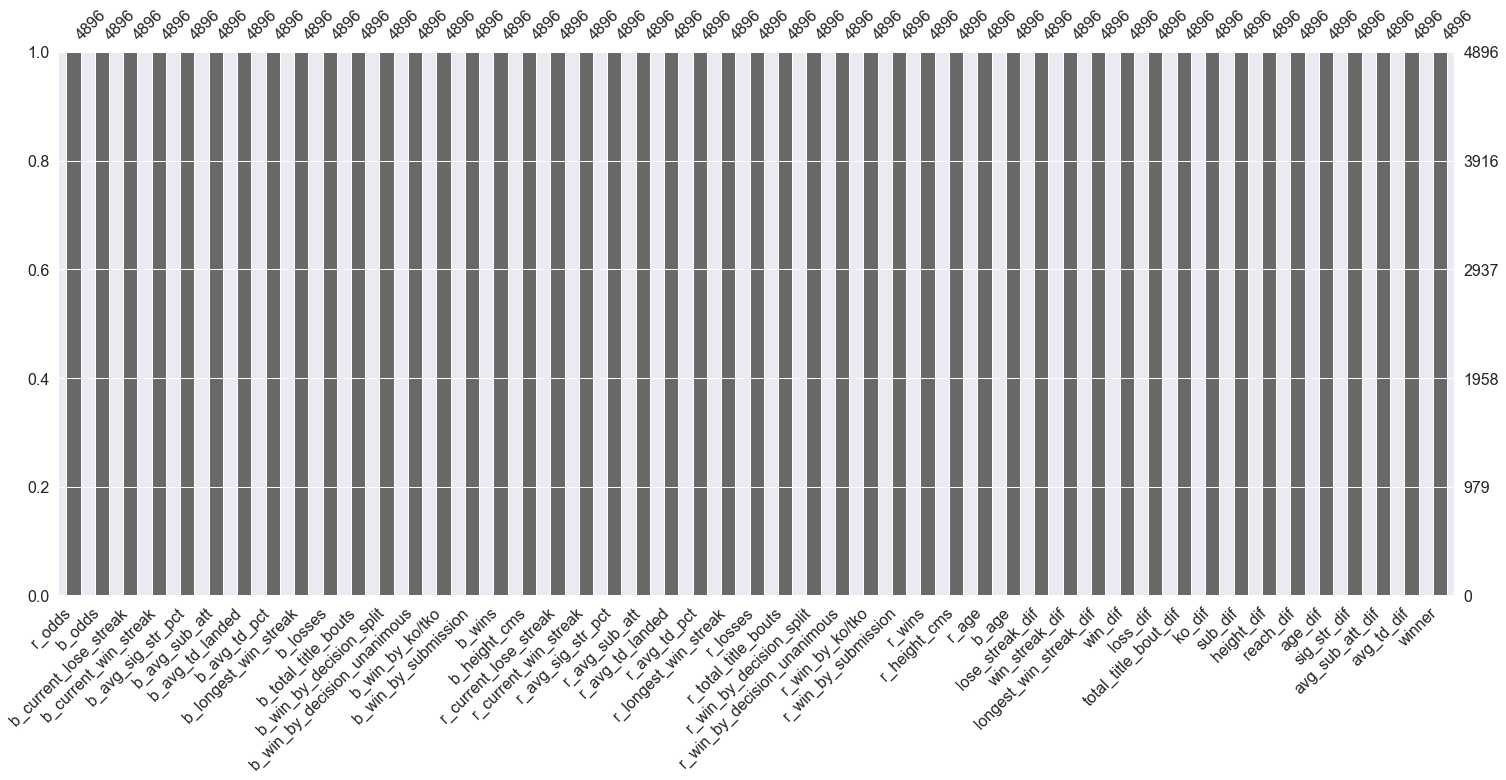

In [1180]:
#let's check whether the missing values are successfully filled
msno.bar(df)
plt.show()

A number of columns in the dataset are post-fight features which won't be necessary while predicting. Let's filter out some unnecessary variables. 

In [1394]:
'''
Let's keep the most significant features
'''
insig_feat = ['gender',  'location', 'country',  'empty_arena', 
              'constant_1', 'no_of_rounds', 'b_reach_cms', 'r_reach_cms', 
              'total_round_dif',  'finish_round_time', 'finish', 
              
              
              'b_draw', 'b_total_rounds_fought',  'r_fighter', 'b_fighter',
              'b_win_by_tko_doctor_stoppage', 'b_weight_lbs',
              'b_match_weightclass_rank', 'b_women\'s flyweight_rank', 'b_women\'s featherweight_rank',
              'b_women\'s strawweight_rank', 'b_women\'s bantamweight_rank', 'b_heavyweight_rank',
              'b_light heavyweight_rank', 'b_welterweight_rank', 'b_flyweight_rank',
              'b_pound-for-pound_rank', 'r_ev', 'b_ev', 'weight_class','b_stance','r_stance','better_rank',
              
               'r_draw', 'r_total_rounds_fought', 'r_avg_sig_str_landed', 'b_avg_sig_str_landed',
              'r_win_by_tko_doctor_stoppage', 'r_weight_lbs', 
              'r_match_weightclass_rank', 'r_women\'s flyweight_rank', 'r_women\'s featherweight_rank',
              'r_women\'s strawweight_rank', 'r_women\'s bantamweight_rank', 'r_heavyweight_rank',
              'r_light heavyweight_rank', 'r_welterweight_rank', 'r_flyweight_rank',
              'r_pound-for-pound_rank', 'finish_details',  'finish_round', 
              'r_dec_odds', 'b_dec_odds', 'r_sub_odds', 'b_sub_odds', 'r_ko_odds', 'b_ko_odds', 
              'b_win_by_decision_majority', 'r_win_by_decision_majority', 'total_fight_time_secs',
              'b_featherweight_rank', 'b_bantamweight_rank', 'b_lightweight_rank', 'b_middleweight_rank',
              'r_middleweight_rank', 'r_lightweight_rank', 'r_featherweight_rank', 'r_bantamweight_rank', 
             ]

In [1395]:
df.drop(insig_feat, axis=1, inplace=True)

In [1396]:
print(f'Remaining features: {df.iloc[:,:-1].shape[1]}')

Remaining features: 48


In [1397]:
df['loss_dif'] = abs(df['b_losses']-df['r_losses'])
df['win_dec_dif'] = abs(df['b_win_by_decision_split']-df['r_win_by_decision_split'])
df['win_dec_una'] = abs(df['b_win_by_decision_unanimous']-df['r_win_by_decision_unanimous'])
df['win_tko'] = abs(df['b_win_by_ko/tko']-df['r_win_by_ko/tko'])
df['win_sub'] = abs(df['b_win_by_submission']-df['r_win_by_submission'])

In [1398]:
'''Converting American odds 
to decimal odds'''

df['r_odds'] = df['r_odds'].apply(lambda x: round(x/100+1,2) if x>0 else round(100/abs(x)+1,2))
df['b_odds'] = df['b_odds'].apply(lambda x: round(x/100+1,2) if x>0 else round(100/abs(x)+1,2))

In [1399]:
df[['r_odds', 'b_odds']].head()

,r_odds,b_odds
0,1.67,2.30
1,2.70,1.50
2,2.10,1.77
3,1.15,5.75
4,1.74,2.15


In [1400]:
'''Let's generate our target variable
'''
df['favourite'] = df['r_odds'] < df['b_odds'] 
df['favourite'] = df['favourite'].astype('int64') # From boolean to integer

df['bet_correct'] = df['winner'] == df['favourite']
df['bet_correct'] = df['bet_correct'].astype(int)
bets = df[['winner', 'favourite', 'bet_correct']]
accuracy = bets['bet_correct'].sum() 
print(f'The rate of favourite fighter coming on top throughout the UFC history across all weight divisions: {accuracy / len(df)}') 

The rate of favourite fighter coming on top throughout the UFC history across all weight divisions: 0.6495098039215687


In [1401]:
df.drop(['win_streak_dif', 'longest_win_streak_dif', 'win_dif',
'loss_dif', 'ko_dif', 'sub_dif', 'height_dif', 'age_dif', 
'sig_str_dif', 'avg_sub_att_dif', 'avg_td_dif', 'win_dec_dif',
'win_dec_una', 'win_tko', 'win_sub', 'reach_dif',
'lose_streak_dif', 'total_title_bout_dif'
], axis=1, inplace=True) 

In [1402]:
for f in df.columns:
    if df[f].dtype!='O' and df[f].dtype!='datetime64[ns]':
        df[f] = abs(df[f]) 

In [1403]:
'''Coercing outliers via 
mean+3td method'''

def coerce_outliers(col_name): 
    age_values = df[col_name].unique() 
    upper_border = df[col_name].mean() + 3*(df[col_name].std())
    lower_border = df[col_name].mean() - 3*(df[col_name].std()) 
    for num in age_values:
        if num>upper_border:
            df[col_name].replace({num: upper_border}, inplace=True) 
        elif num<lower_border:
            df[col_name].replace({num: lower_border}, inplace=True) 
    return df[col_name]  

In [1404]:
for f in df.columns:
    if f!='winner' and f!='better_rank':
        coerce_outliers(f)

In [1405]:
# The data which's prepared for modelling
df.head()

,r_odds,b_odds,b_current_lose_streak,b_current_win_streak,b_avg_sig_str_pct,b_avg_sub_att,b_avg_td_landed,b_avg_td_pct,b_longest_win_streak,b_losses,b_total_title_bouts,b_win_by_decision_split,b_win_by_decision_unanimous,b_win_by_ko/tko,b_win_by_submission,b_wins,b_height_cms,r_current_lose_streak,r_current_win_streak,r_avg_sig_str_pct,r_avg_sub_att,r_avg_td_landed,r_avg_td_pct,r_longest_win_streak,r_losses,r_total_title_bouts,r_win_by_decision_split,r_win_by_decision_unanimous,r_win_by_ko/tko,r_win_by_submission,r_wins,r_height_cms,r_age,b_age,winner,favourite,bet_correct
0,1.67,2.30,0.0,1.0,0.59,0.7,0.24,0.993355,4.0,2.0,0.0,0.000000,1.000000,4.0,0.0,5.0,198.12,3.0,0.0,0.48,0.1,0.61,0.36,4.0,8.0,1.0,0.0,2.0,7.672705,0.0,13.0,187.96,37.0,29.0,1,1,1
1,2.70,1.50,2.0,0.0,0.42,0.8,0.79,0.220000,2.0,5.0,0.0,0.000000,0.000000,4.0,2.0,6.0,182.88,2.0,0.0,0.51,0.5,2.27,0.37,4.0,8.0,0.0,1.0,3.0,4.000000,3.0,11.0,180.34,33.0,32.0,0,0,1
2,2.10,1.77,1.0,0.0,0.41,0.1,1.15,0.340000,5.0,5.0,0.0,1.992097,5.463074,1.0,0.0,9.0,185.42,1.0,0.0,0.49,1.7,4.48,0.44,4.0,4.0,0.0,0.0,0.0,1.000000,5.0,6.0,190.50,34.0,32.0,0,0,1
3,1.15,5.75,1.0,0.0,0.34,0.0,0.00,0.000000,0.0,1.0,0.0,0.000000,0.000000,0.0,0.0,0.0,177.80,1.0,0.0,0.36,0.0,1.57,0.35,2.0,3.0,0.0,0.0,2.0,2.000000,0.0,4.0,175.26,29.0,32.0,1,1,1
4,1.74,2.15,0.0,2.0,0.56,0.0,2.54,0.390000,2.0,3.0,0.0,0.000000,4.000000,1.0,0.0,5.0,175.26,0.0,4.0,0.62,0.6,2.85,0.52,4.0,0.0,0.0,0.0,2.0,0.000000,2.0,4.0,175.26,28.0,33.0,0,1,0


In [1406]:
df.drop(['winner', 'favourite'
        ], axis=1, inplace=True)

Text(0, 0.5, 'Count')

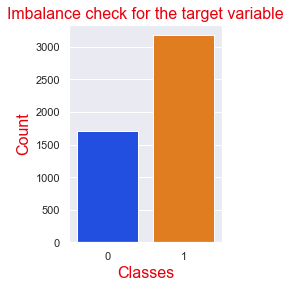

In [1407]:
'''Our target variable is imbalanced, 
whereas the heart of the issue is predicting 
whether the underdog fighter wins or not'''

plt.subplot(1, 2, 2)
sns.countplot(x = 'bet_correct', data = df)
plt.title(label = 'Imbalance check for the target variable', fontsize = 16, color='r')
plt.xlabel(xlabel = 'Classes', fontsize = 16, color='r')
plt.ylabel(ylabel = 'Count', fontsize = 16, color='r')

In [1408]:
scaler = RobustScaler()
df.iloc[:,:-1] = scaler.fit_transform(df.iloc[:,:-1])
df = pd.DataFrame(df)

Modelling: Logistic Regression (LR)

In [1409]:
X = df.drop('bet_correct', axis=1)
y = df['bet_correct']

In [1848]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.10)
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((4406, 34), (4406,), (490, 34), (490,))

In [1849]:
sm = SMOTE(random_state = 2)
X_sm, Y_sm = oversampling.fit_resample(X_train, y_train.ravel())  

In [1850]:
log_reg = LogisticRegression(max_iter=1000, C=0.05, random_state=42)
log_model = log_reg.fit(X_sm, Y_sm) 

In [1851]:
y_pred = log_reg.predict(X_test)

In [1852]:
log_reg.score(X_sm, Y_sm)

0.6126289126108196

In [1853]:
log_reg.score(X_test,y_test)

0.6265306122448979

In [1860]:
recall_score(y_test, y_pred, average='micro') 

0.6265306122448979

In [1855]:
precision_score(y_test, y_pred, average='weighted') 

0.7121721110702874

In [1856]:
f1_score(y_test, y_pred, average='weighted') 

0.6339163833590512

In [1857]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.47      0.80      0.59       167
           1       0.84      0.54      0.66       323

    accuracy                           0.63       490
   macro avg       0.65      0.67      0.62       490
weighted avg       0.71      0.63      0.63       490



In [1858]:
print(confusion_matrix(y_test, y_pred))

[[133  34]
 [149 174]]
